In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# We will create a function so we dont have to write the same code for ploting again and again
import matplotlib.pyplot as plt

def show_results(images, titles=None, cols=4, figsize=(16, 6), cmap='gray'):
    """
    Display multiple images side by side.

    Parameters:
        images (list): List of images to display.
        titles (list, optional): List of titles for each image.
        cols (int, optional): Number of columns in the subplot grid.
        figsize (tuple, optional): Figure size.
        cmap (str, optional): Colormap for displaying grayscale images.
    """
    n = len(images)
    rows = (n + cols - 1) // cols  # Compute rows automatically

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel()  # Flatten axes for easy iteration

    for i in range(n):
        axes[i].imshow(images[i], cmap=cmap)
        if titles:
            axes[i].set_title(titles[i])
        axes[i].axis('off')

    # Hide unused subplots (if any)
    for i in range(n, rows * cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

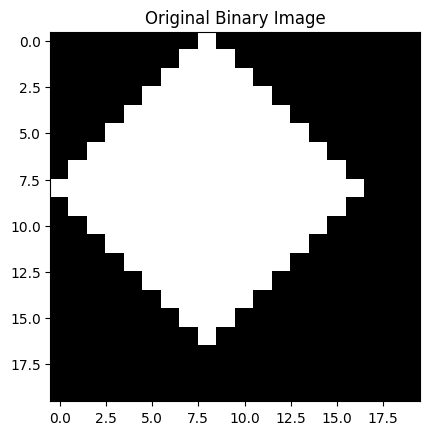

In [7]:
img = np.array([
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
    [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
], dtype=np.uint8)

# Visualize the original image
plt.imshow(img, cmap='gray')
plt.title("Original Binary Image")
plt.show()

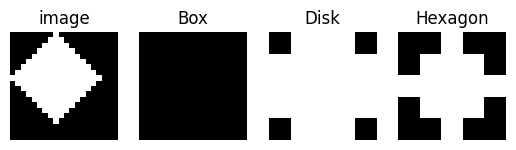

In [24]:
# structural element 
box_se = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
    ], dtype=np.int8)


# disk shape structural element
se_disk = np.array([[0, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [0, 1, 1, 1, 0]], dtype=np.uint8)

# Create a hexagonal structuring element (approximated with a 5x5 matrix)
se_hex = np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)

images = [img ,box_se, se_disk, se_hex]
title = ['image',"Box", "Disk", "Hexagon"]

for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(title[i])
    plt.axis('off')

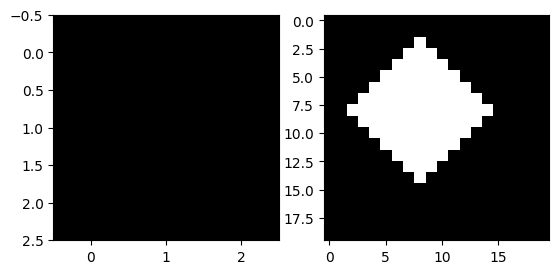

In [ ]:
# erosion techniques
se = box_se
r, c = se.shape
rows, cols = img.shape

pad_size = (r //2, c // 2)
padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
eroded_img = np.zeros_like(img)

for i in range(rows):
    for j in range(cols):
        roi = padded_img[i: i + r, j : j + c]
        if np.all(roi[se == 1] == 1):
            eroded_img[i, j] = 1

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(eroded_img, cmap='gray')



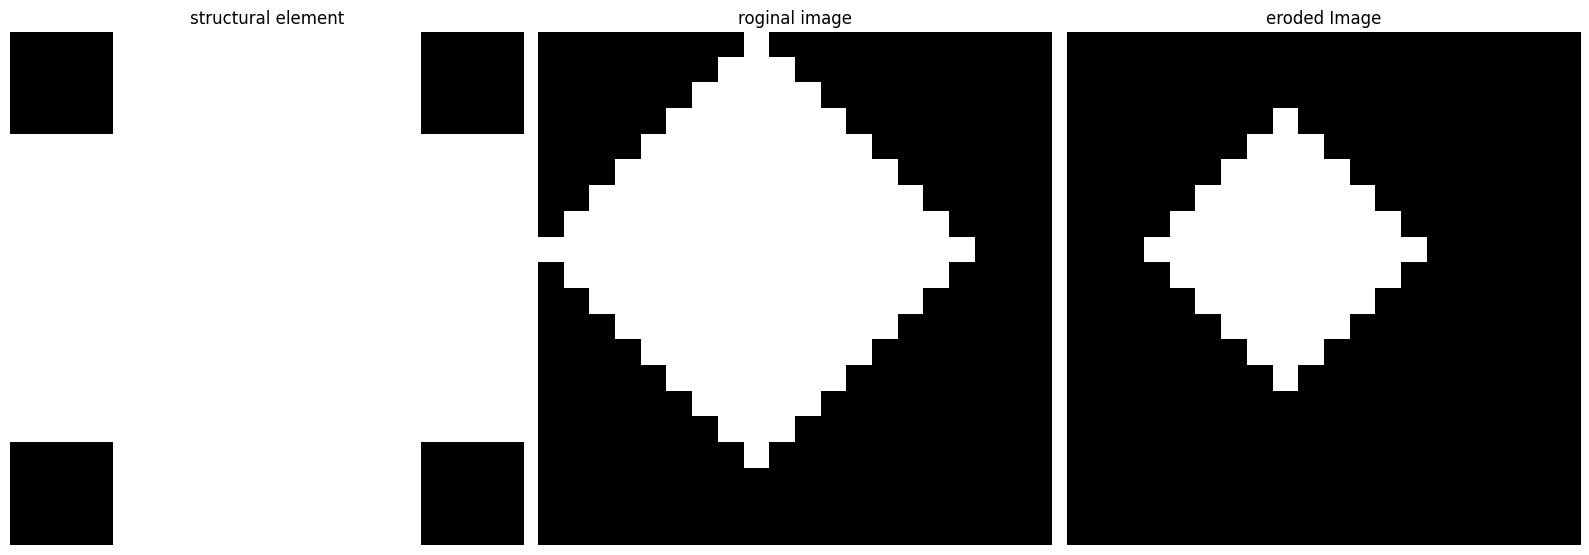

In [31]:
# erode image with disk 
se = se_disk
r, c = se.shape

padding_size = (r // 2, c // 2)

padded_img1 = np.pad(img, padding_size, mode='constant', constant_values=0)
eroded_img1 = np.zeros_like(img, dtype=np.uint8)

rows, cols = img.shape

for row in range(rows):
    for col in range(cols):
        roi = padded_img1[row: row + r, col : col + c]
        if np.all(roi[se == 1] == 1):
            eroded_img1[row, col] = 1

show_results(
    images=[se,img, eroded_img1],
    titles=['structural element', 'roginal image', 'eroded Image'],
    cols=3
)

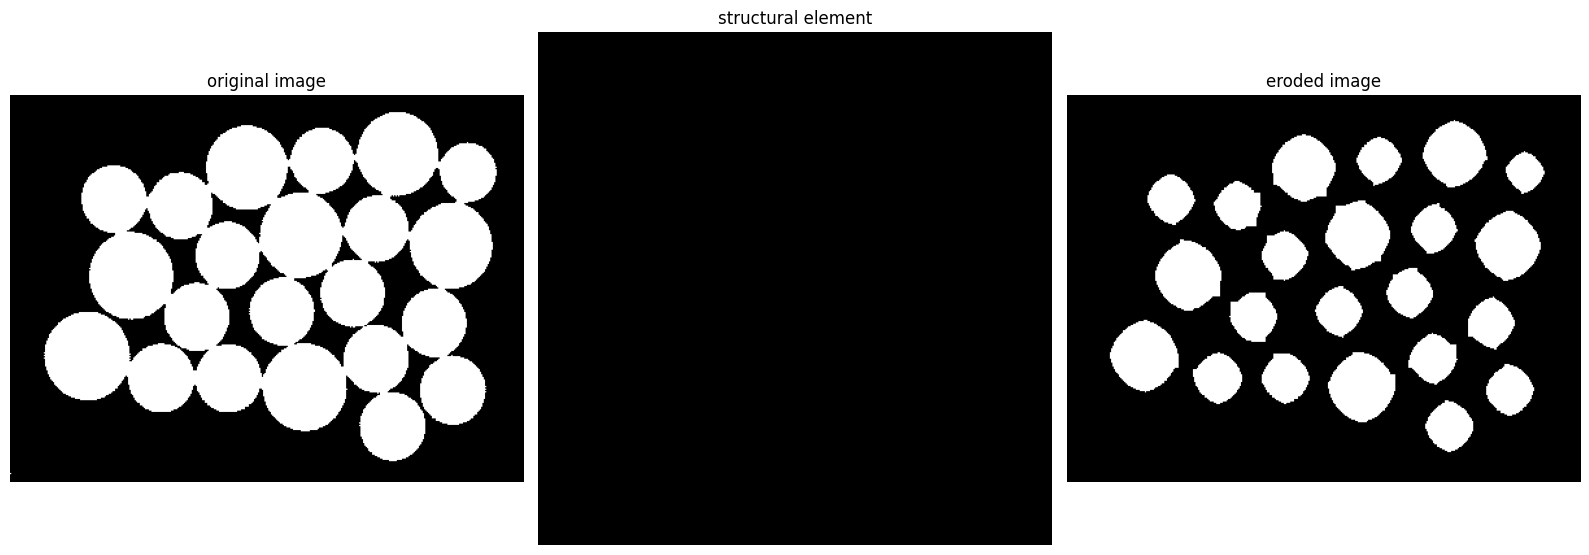

In [42]:
# some practical example erosion
img = cv2.imread('images/c1.png', 0)
img = np.where(100 < img, 0, 1).astype(np.uint8)
se = np.ones((13,13), dtype=np.uint8)


def erosion(img, se):
    r, c = se.shape

    padding_size = (r//2,c//2)
    padded_img2 = np.pad(img, padding_size, mode='constant', constant_values=0)
    eroded_img2 = np.zeros_like(img)
    rows, cols = img.shape

    for row in range(rows):
        for col in range(cols):
            roi = padded_img2[row: row + r, col: col + c]
            if np.all(roi[se == 1] == 1):
                eroded_img2[row,col] = 1
    return eroded_img2

eroded_img = erosion(img, se)
show_results(
    images=[img, se, eroded_img],
    titles=['original image', 'structural element', 'eroded image'],
    cols = 3,
    cmap='gray'
)

In [ ]:
# to create the disk of any shape
def create_disk(radius):
    size = 2 * radius + 1

    disk = np.zeros((size, size), dtype=np.uint8)

    center = radius

    for i in range(size):
        for j in range(size):
            